In [2]:
import kagglehub

path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")

print("Path to dataset files:", path)

100%|██████████| 350M/350M [01:20<00:00, 4.53MB/s] 

Extracting files...


Path to dataset files: /Users/kannavsethi/.cache/kagglehub/datasets/shanegerami/ai-vs-human-text/versions/1


In [5]:
import pandas as pd

df = pd.read_csv("/Users/kannavsethi/Desktop/nlp-final-project/data/AI_Human.csv")

print("The Data:")
print(df.head())

print("The columns:")
print(df.columns)

print("The shape:")
print(df.shape)

print("The info:")
print(df.info())


The Data:
                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0
The columns:
Index(['text', 'generated'], dtype='object')
The shape:
(487235, 2)
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB
None
The description:


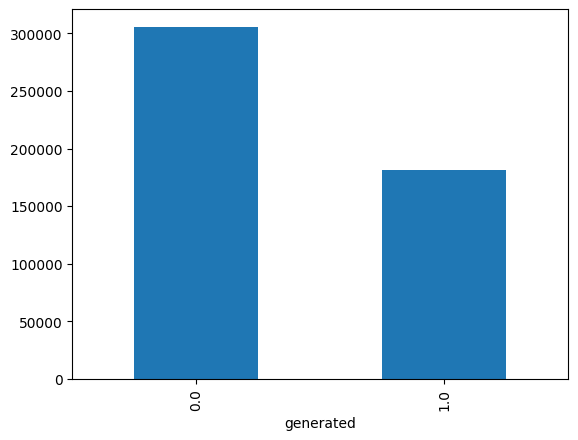

In [7]:
import matplotlib.pyplot as plt

plt.plot(figsize=(10, 5))

df["generated"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 1.0, 'Distribution of Text Lengths')

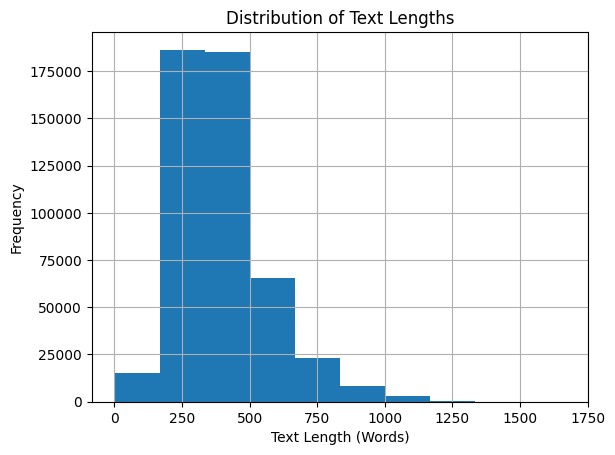

In [9]:
df["text_len_words"] = df["text"].apply(lambda x: len(x.split()))
df["text_len_words"].hist()
plt.xlabel("Text Length (Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")


In [ ]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords


def preprocess_text(text):
    text = text.lower()
    text_list = [t for t in text.split()]
    text_list = [t for t in text_list if t not in string.punctuation]
    text_list = [word for word in text_list if word not in stopwords.words('english')]
    text = " ".join(text_list)
    return text

df["text"] = df["text"].apply(preprocess_text)

print(df["text"].head())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["generated_text"], test_size=0.2, random_state=42)

tfid = TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.9,max_features=20000)
X_train_tfid = tfid.fit_transform(X_train)
X_test_tfid = tfid.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfid, y_train)

y_pred = model.predict(X_test_tfid)

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train_tfid, y_train)

y_pred_svc = model.predict(X_test_tfid)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")


print("Evaluating Logistic Regression Model")
evaluate_model(y_test, y_pred)

print()

print("Evaluating SVM Model")
evaluate_model(y_test, y_pred_svc)